In [1]:
from __future__ import print_function
from __future__ import absolute_import

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Diferenciación Numérica

**OBJETIVO:** Dado un conjunto de $N+1$ puntos $(x_i, y_i)$, calcular la derivada de un orden dado con una precisión especificada.

**Enfoque:** Encuentra el polinomio interpolante $P_N(x)$ y deriva ese polinomio.

### Polinomios de Newton

Aunque el polinomio interpolante $P_N(x)$ a través de $N+1$ puntos distintos es único, se puede expresar en términos de muchas bases.

Hasta ahora hemos considerado la base monomial $< 1,x,x^2,\ldots,x^n>$ y la base de Lagrange $\ell_i(x)$.

Sin embargo, para nuestros propósitos aquí es más conveniente usar la *Base del Polinomio de Newton*.

\begin{align}
    n_0 &= 1\\
    n_j(x) &= \prod^{j-1}_{i=0} (x - x_i)\quad\mathrm{para}\quad j>0 \\
\end{align}

### Polinomios de Newton

Desarrollándolos, tenemos:

\begin{align}
    n_0(x) &= 1\\
    n_1(x) &= (x-x_0) \\
    n_2(x) &= (x - x_0)(x-x_1)\\
        &\vdots \\
    n_N(x) &= (x - x_0)(x - x_1)\cdots(x-x_{N-1})\\
\end{align}

Nota: Los polinomios de Newton tienen algunas características comunes tanto con los monomios como con los polinomios de Lagrange.

* Como los monomios, son polinomios mónicos de grado creciente en $x$, es decir, $n_2(x)$ es cuadrático.
* Como los polinomios de Lagrange, algunos polinomios de Newton se anulan en los puntos de interpolación $x_i$. En particular:

$$
    n_j(x_i) = 0 \quad \mathrm{para}\quad j > i
$$

### Forma de Newton

Esta última característica hace conveniente resolver el polinomio interpolante.

$$P_N(x) = \sum^N_{j=0} a_j n_j(x)$$

como el sistema lineal de tamaño $(N+1) \times (N+1)$

$$
    P_N(x_i) = y_i\quad\mathrm{para}\quad i=0,\ldots,N
$$

#### Se convierte en el sistema triangular inferior

$$
\begin{bmatrix}
1 & 0 & 0 & \ldots & 0 \\
1 & (x_1-x_0) & 0 & \ldots & 0 \\
1 & (x_2-x_0) & (x_2-x_0)(x_2-x_1) & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots  \\
1 & n_1(x_n) & n_2(x_n) & \ldots & n_n(x_n) \\
\end{bmatrix}\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n \\
\end{bmatrix}=
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}
$$

Que se puede resolver secuencialmente comenzando con

\begin{align}
    a_0 & = y_0\\
    a_1 & = \frac{y_1 - y_0}{x_1 - x_0} \\
    a_2 & = \frac{y_2 - y_0 - a_1(x_2 - x_0)}{(x_2-x_0)(x_2-x_1)} \\
    &\vdots \\
\end{align}


### Diferencias Divididas (Finitas)

Los $a_j = [y_0, \ldots, y_j]$ también se conocen como *diferencias divididas*, las cuales se definen recursivamente como

$$[y_i] = y_i \quad i \in \{0,\ldots, N+1\}$$

y

$$[y_i, \ldots , y_{i+j}] = \frac{[y_{i+1}, \ldots , y_{i + j}] - [y_{i},\ldots,y_{i+j-1}]}{x_{i+j} - x_{i}} \quad i \in \{0,\ldots,N+1 - j\} \quad j \in \{1,\ldots, N+1\}$$

Estas fórmulas están definidas recursivamente, pero no son tan útiles de inmediato. Aquí algunos ejemplos para comenzar:

$$[y_0] = y_0$$

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_{2} - x_{0}} = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)}$$

El beneficio de escribir un polinomio de esta manera es que aísla la dependencia de $x$ (podemos tomar fácilmente derivadas de esta forma).

En general, $P_N(x)$ se puede escribir en la forma de Newton como

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$


In [2]:
def divided_difference(x, y, N=50):
    """Compute the Nth finite difference using *x* and *y*"""
    if N == 0:
        raise Exception("Reached recursion limit!")
    
    # Reached the end of the recurssion
    if y.shape[0] == 1:
        return y[0]
    elif y.shape[0] == 2:
        return (y[1] - y[0]) / (x[1] - x[0])
    else:
        return (divided_difference(x[1:], y[1:], N=N-1) - divided_difference(x[:-1], y[:-1], N=N-1)) / (x[-1] - x[0])
    
def newton_basis(x, x0):
    """ construct newton basis for the interpolating polynomial given interpolation points x0"""
    basis = numpy.ones((len(x0), len(x)))
    for j in range(len(x0)):
        for i in range(j):
            basis[j, :] *= (x - x0[i])
    return basis

def P_newton(x, data):
    """ construct the interpolating polynomial of order N through the N+1 data points data using a Newton basis"""
    P = numpy.zeros(x.shape)
    basis = newton_basis(x, data[:,0])
    for j in range(data.shape[0]):
        P += divided_difference(data[:j + 1, 0], data[:j + 1, 1]) * basis[j, :]
        
    return P

In [26]:
# Calculate a polynomial in Newton Form
data = numpy.array([[-2.0, 1.0], [-1.5, -1.0], [-0.5, -3.0], [0.0, -2.0], [1.0, 3.0], [2.0, 1.0]])
x = numpy.linspace(-2.0, 2.0, 100)
basis = newton_basis(x, data[:,0])
P = P_newton(x, data)
N = data.shape[0] - 1

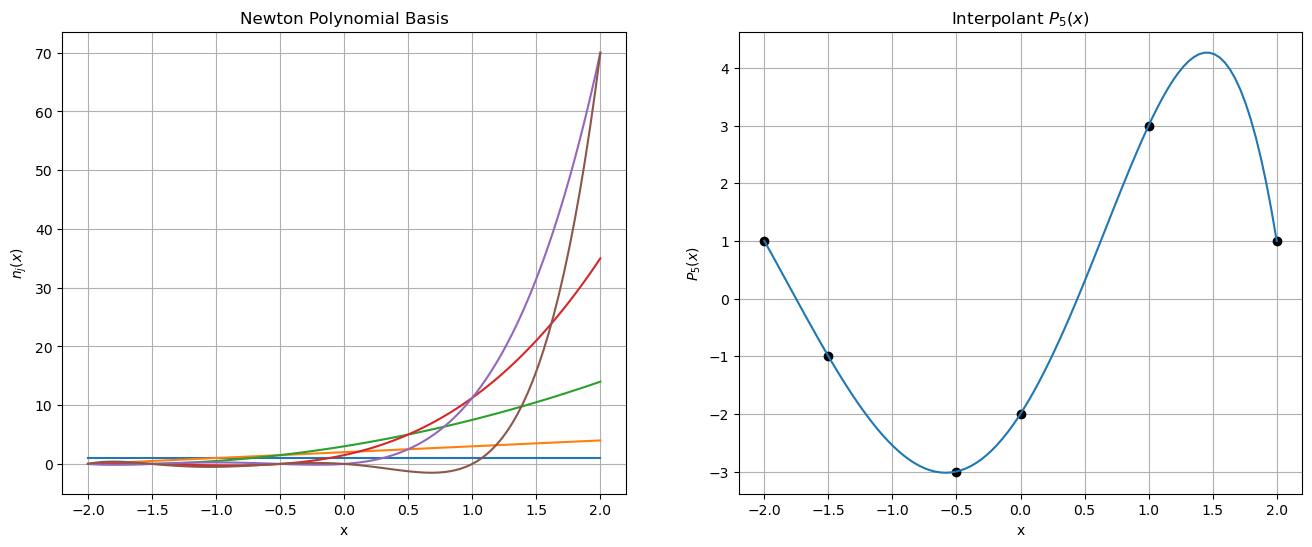

In [27]:
# Plot basis and interpolant
fig = plt.figure(figsize = (16,6))
fig.subplots_adjust(hspace=.5)

axes = [None, None]
axes[0] = fig.add_subplot(1, 2, 1)
axes[1] = fig.add_subplot(1, 2, 2)

for j in range(N + 1):
    axes[0].plot(x, basis[j, :])
    axes[1].plot(data[j, 0], data[j, 1],'ko')
axes[1].plot(x, P)

axes[0].set_title("Newton Polynomial Basis")
axes[0].set_xlabel("x")
axes[0].set_ylabel("$n_j(x)$")
axes[0].grid()

axes[1].set_title("Interpolant $P_%s(x)$" % N)
axes[1].set_xlabel("x")
axes[1].set_ylabel("$P_%s(x)$" % N)
axes[1].grid()

plt.show()

Como otro ejemplo concreto, considera el polinomio cuadrático general escrito en la forma de Newton:

$$P_2(x) = [y_0] + (x - x_0) [y_0, y_1] + (x - x_0)(x - x_1) [y_0, y_1, y_2] \\= y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} \right )$$

¡Recuerda que el polinomio interpolante de grado $N$ a través de estos puntos es único!

### Análisis de Error

Dado un conjunto de $N + 1$ puntos, podemos formar un interpolante $P_N(x)$ de grado $N$ donde

$$f(x) = P_N(x) + R_N(x)$$

Y sabemos por el Teorema de Lagrange que el término del residuo tiene la forma

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N})(x - x_{N+1}) \frac{f^{(N+1)}(c)}{(N+1)!}$$

notando que necesitamos que $f(x) \in C^{N+1}$ en el intervalo de interés. Al tomar la derivada del interpolante $P_N(x)$ llegamos a

$$P_N'(x) = [y_0, y_1] + ((x - x_1) + (x - x_0)) [y_0, y_1, y_2] + \cdots + \left(\sum^{N-1}_{i=0}\left( \prod^{N-1}_{j=0,~j\neq i} (x - x_j) \right )\right ) [y_0, y_1, \ldots, y_N]$$

De manera similar, podemos encontrar la derivada del término del residuo $R_N(x)$ como

$$R_N'(x) = \left(\sum^{N}_{i=0} \left( \prod^{N}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f^{(N+1)}(c)}{(N+1)!}$$

Ahora, si consideramos la aproximación de la derivada evaluada en uno de nuestros puntos de datos $(x_k, y_k)$, estas expresiones se simplifican de modo que

$$f'(x_k) = P_N'(x_k) + R_N'(x_k)$$

Si dejamos que $\Delta x = \max_i |x_k - x_i|$, sabemos que el término del residuo será $\mathcal{O}(\Delta x^N)$ cuando $\Delta x \rightarrow 0$, mostrando así que este enfoque converge y que podemos encontrar aproximaciones de orden arbitrariamente alto (ignorando el error de punto flotante).

### <font color='red'>Precaución</font>

¡Un alto orden no implica necesariamente alta precisión!


In [28]:
def PN_prime(x, data):
    """ calculate derivative of interpolating polynomail at point x"""
    # General form of derivative of P_N'(x)
    P_prime = numpy.zeros(x.shape)
    newton_basis_prime = numpy.empty(x.shape)
    product = numpy.empty(x.shape)
    N = data.shape[0] - 1
    for n in range(N + 1):
        newton_basis_prime = 0.0
        for i in range(n):
            product = 1.0
            for j in range(n):
                if j != i:
                    product *= (x - data[j, 0])
            newton_basis_prime += product
        P_prime += divided_difference(data[:n+1, 0], data[:n+1, 1]) * newton_basis_prime
        
    return P_prime

In [29]:
num_points = 4
xmin = -2.
xmax = 2.
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(xmin, xmax, num_points)
data[:, 1] = numpy.sin(data[:, 0])
x = numpy.linspace(xmin, xmax, 100)
P_prime = PN_prime(x, data)

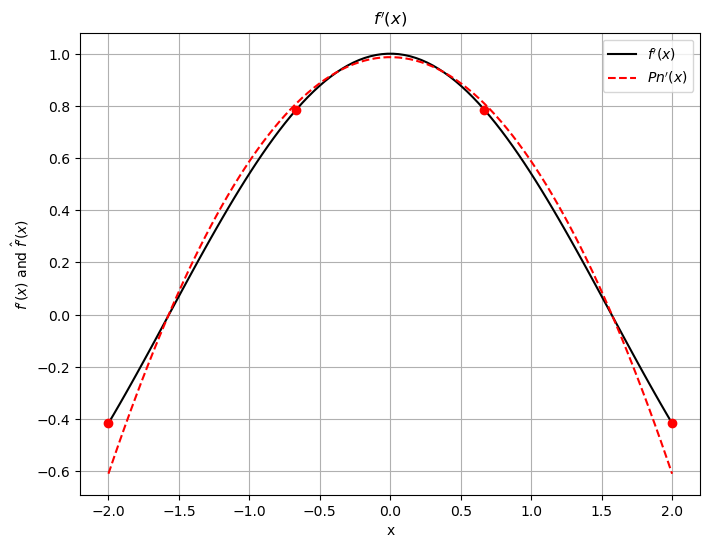

In [30]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.cos(x), 'k', label="$f'(x)$")
axes.plot(x, P_prime, 'r--', label="$Pn'(x)$")
axes.plot(data[:,0], numpy.cos(data[:,0]), 'ro')
axes.legend(loc='best')
axes.set_title("$f'(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$f'(x)$ and $\hat{f}'(x)$")
axes.grid()

plt.show()

### Diferencias finitas

A menudo, en la práctica solo utilizamos un pequeño número de puntos de datos para derivar una fórmula de diferenciación. En el contexto de las ecuaciones diferenciales, también tenemos frecuentemente $f(x)$ de modo que $f(x_k) = y_k$ y podemos aproximar la derivada de una función conocida $f(x)$.


### Caso 1: Diferencias Hacia Adelante y Hacia Atrás de 1er Orden

Usando 2 puntos podemos obtener una aproximación de orden $\mathcal{O}(\Delta x)$:

$$f'(x) \approx P_1'(x) = [y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0} = \frac{y_1 - y_0}{\Delta x} = \frac{f(x_1) - f(x_0)}{\Delta x}$$

También podemos calcular el error como

$$R_1'(x) = -\Delta x \frac{f''(c)}{2}$$

Podemos derivar las fórmulas "adelante" y "atrás" considerando el problema de manera ligeramente diferente. Supongamos que queremos $f'(x_n)$, entonces la diferencia finita "adelante" puede escribirse como

$$f'(x_n) \approx D_1^+ = \frac{f(x_{n+1}) - f(x_n)}{\Delta x}$$

y la diferencia finita "atrás" como

$$f'(x_n) \approx D_1^- = \frac{f(x_n) - f(x_{n-1})}{\Delta x}$$

Toma en cuenta que estas aproximaciones deberían ser familiares, ya que en el límite cuando $\Delta x \rightarrow 0$, estas dejan de ser aproximaciones y se convierten en definiciones equivalentes de la derivada en $x_n$.

In [31]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute forward difference using a loop
f_prime_hat = numpy.empty(x_hat.shape)
for i in range(N - 1):
    f_prime_hat[i] = (f(x_hat[i+1]) - f(x_hat[i])) / delta_x
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x

# Vector based calculation
# f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x)

# Use first-order differences for points at edge of domain
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N

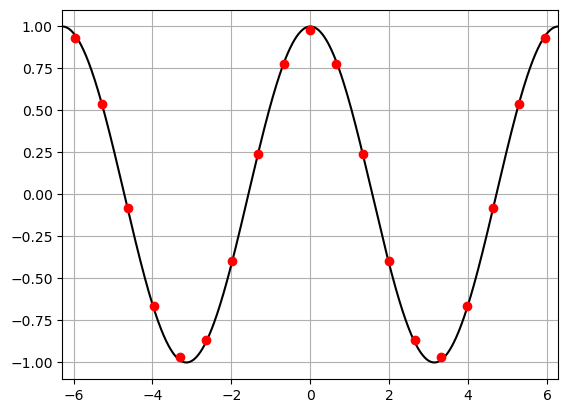

In [32]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat + 0.5 * delta_x, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))
axes.grid()

plt.show()

#### Cálculo del Orden de Convergencia

Supongamos que tenemos el error $E(\Delta x)$ y queremos hacer una declaración sobre la tasa de convergencia (nota que podemos reemplazar $E$ aquí con el $R$ mencionado anteriormente). Entonces podemos hacer lo siguiente:
$$\begin{aligned}
    E(\Delta x) &= C \Delta x^n \\
    \log E(\Delta x) &= \log C + n \log \Delta x
\end{aligned}$$

¡La pendiente de la línea es $n$ cuando modelamos el error de esta manera! También podemos ajustar el primer punto resolviendo para $C$:

$$
    C = e^{\log E(\Delta x) - n \log \Delta x}
$$


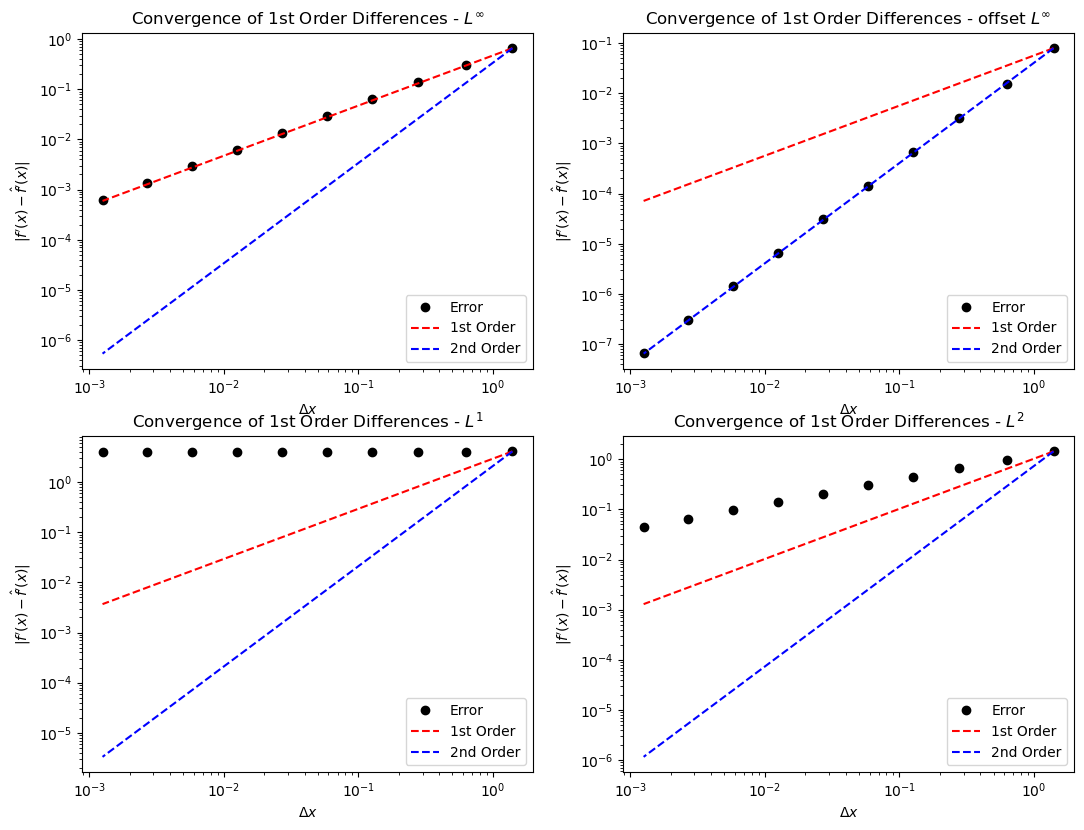

In [33]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Compute the error as a function of delta_x
N_range = numpy.logspace(1, 4, 10, dtype=int)
delta_x = numpy.empty(N_range.shape)
error = numpy.empty((N_range.shape[0], 4))
for (i, N) in enumerate(N_range):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x[i] = x_hat[1] - x_hat[0]

    # Compute forward difference
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x[i])

    # Use first-order differences for points at edge of domain
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[i]  # Backward Difference at x_N
    
    # The differences in error computations is interesting here.  Note that the L_\infty norm returns a single
    # point-wise like error where as the L_2 and L_1 are adding error up so they exhbit less convergence
    error[i, 0] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.inf)
    error[i, 1] = numpy.linalg.norm(numpy.abs(f_prime(x_hat + 0.5 * delta_x[i]) - f_prime_hat), ord=numpy.inf)
    error[i, 2] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=1)
    error[i, 3] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2)
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
# plt.rc('legend', fontsize=6)
# plt.rc('font', size=6)

error_type = ['$L^\infty$', 'offset $L^\infty$', '$L^1$', '$L^2$']
for i in range(error.shape[1]):
    axes = fig.add_subplot(2, 2, i + 1)
    axes.loglog(delta_x, error[:, i], 'ko', label="Error")

    order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 1.0) * delta_x**1.0, 'r--', label="1st Order")
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
    axes.legend(loc=4)
    axes.set_title("Convergence of 1st Order Differences - %s" % error_type[i])
    axes.set_xlabel("$\Delta x$")
    axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")

plt.show()

### Caso 2: Diferencia Centrada de 2do Orden

Ahora usemos 3 puntos para calcular la diferencia finita de segundo orden. Considera los puntos $(x_{n}, y_{n})$, $(x_{n-1}, y_{n-1})$, y $(x_{n+1}, y_{n+1})$, de antes tenemos

$$\begin{aligned}
    P_2(x) &= [f(x_0)] + (x - x_0) [f(x_0), f(x_1)] + (x - x_0)(x - x_1) [f(x_0), f(x_1), f(x_2)] \\
    &= f(x_0) + (x - x_0) \frac{f(x_1) - f(x_0)}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{f(x_2) - f(x_1)}{(x_2 - x_1)(x_2 - x_0)} - \frac{f(x_1) - f(x_0)}{(x_1 - x_0)(x_2 - x_0)} \right )
\end{aligned}$$

Calcula la fórmula para la derivada. Supón que la distancia entre los $x_i$ es igual.

$$\begin{aligned}
    P_2'(x) &= [f(x_n), f(x_{n+1})] + ((x - x_n) + (x - x_{n+1})) [f(x_n), f(x_{n+1}), f(x_{n-1})] \\
    &= \frac{f(x_{n+1}) - f(x_n)}{x_{n+1} - x_n}  + ((x - x_n) + (x - x_{n+1}))\\ &* \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{(x_{n-1} - x_{n+1})(x_{n-1} - x_n)} - \frac{f(x_{n+1}) - f(x_n)}{(x_{n+1} - x_n)(x_{n-1} - x_n)} \right )
\end{aligned}$$

Evaluando en $x_n$ y asumiendo que los puntos $x_{n-1}, x_n, x_{n+1}$ están igualmente espaciados obtenemos

$$\begin{aligned}
    P_2'(x_n) &= \frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \Delta x \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{2\Delta x^2} + \frac{f(x_{n+1}) - f(x_n)}{\Delta x^2} \right ) \\
    &=\frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \left ( \frac{f(x_{n+1}) - 2f(x_n) + f(x_{n-1})}{2\Delta x}\right ) \\
    &=\frac{2f(x_{n+1}) - 2f(x_n) - f(x_{n+1}) + 2f(x_n) - f(x_{n-1})}{2 \Delta x} \\
    &=\frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}
\end{aligned}$$

Esta diferencia finita de segundo orden de presición y está centrada en el punto que se pretende aproximar ($x_n$). Podemos demostrar que es de segundo orden al considerar nuevamente la derivada del término del residuo.

$$\begin{aligned}
    R_2'(x) &= \left(\sum^{2}_{i=0} \left( \prod^{2}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f'''(c)}{3!} \\
    &= \left ( (x - x_{n+1}) (x - x_{n-1}) + (x-x_n) (x-x_{n-1}) + (x-x_n)(x-x_{n+1}) \right ) \frac{f'''(c)}{3!}
\end{aligned}$$

Nuevamente, evaluando esta expresión en $x = x_n$ y asumiendo puntos igualmente espaciados, tenemos

$$R_2'(x_n) = -\Delta x^2 \frac{f'''(c)}{3!}$$

lo que muestra que nuestro error es $\mathcal{O}(\Delta x^2)$.

In [34]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 21
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_prime_hat = numpy.empty(x_hat.shape)
f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2. * delta_x)

# Use first-order differences for points at edge of domain
f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x     # Forward Difference at x_0
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N
#f_prime_hat[0] = (-3.0 * f(x_hat[0]) + 4.0 * f(x_hat[1]) - f(x_hat[2])) / (2.0 * delta_x)
#f_prime_hat[-1] = (3.0 * f(x_hat[-1]) - 4.0 * f(x_hat[-2]) + f(x_hat[-3])) / (2.0 * delta_x)

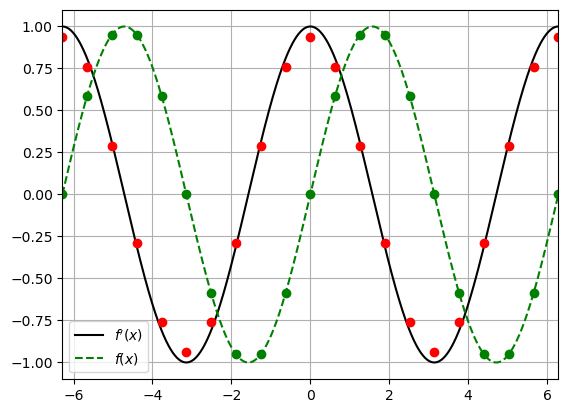

In [35]:
fig = plt.figure()
plt.rcdefaults()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k',label="$f'(x)$")
axes.plot(x_hat, f_prime_hat, 'ro')
axes.plot(x, f(x),'g--',label="$f(x)$")
axes.plot(x_hat, f(x_hat), 'go')
axes.set_xlim((x[0], x[-1]))
# axes.set_ylim((-1.1, 1.1))
axes.grid()
axes.legend()

plt.show()

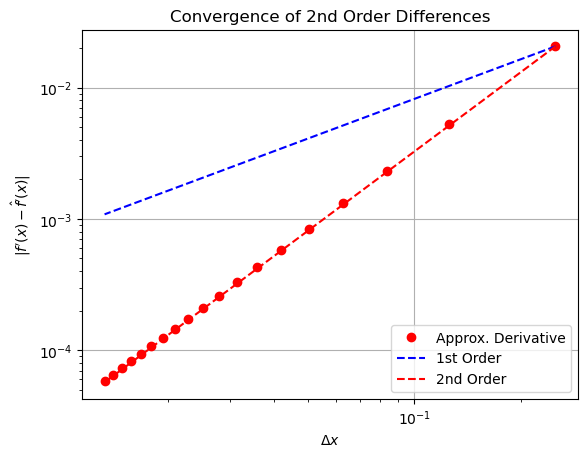

In [36]:
# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in range(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N + 1)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[-1])

    # Use first-order differences for points at edge of domain
    f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x[-1]  
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]
    # Use second-order differences for points at edge of domain
    f_prime_hat[0] =  (-3.0 * f(x_hat[0])  +  4.0 * f(x_hat[1])  + - f(x_hat[2]))  / (2.0 * delta_x[-1])
    f_prime_hat[-1] = ( 3.0 * f(x_hat[-1]) + -4.0 * f(x_hat[-2]) +   f(x_hat[-3])) / (2.0 * delta_x[-1])
    
    # Compute Error
    error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.inf))
#     error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, "ro", label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 2nd Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")
axes.grid()

plt.show()

### Derivaciones Alternativas

Un método alternativo para encontrar fórmulas de diferencias finitas es mediante el uso de expansiones en series de Taylor alrededor del punto que queremos aproximar. La serie de Taylor alrededor de $x_n$ es

$$f(x) = f(x_n) + (x - x_n) f'(x_n) + \frac{(x - x_n)^2}{2!} f''(x_n) + \frac{(x - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x - x_n)^4)$$


Supongamos que queremos derivar la aproximación de la primera derivada de segundo orden preciso que acabamos de hacer, esto requiere los valores $(x_{n+1}, f(x_{n+1})$ y $(x_{n-1}, f(x_{n-1})$. Podemos expresar estos valores a través de nuestra aproximación en serie de Taylor como

\begin{aligned}
    f(x_{n+1}) &= f(x_n) + (x_{n+1} - x_n) f'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) \\
\end{aligned}

o
\begin{aligned}
&= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{aligned}

y

\begin{align}
f(x_{n-1}) &= f(x_n) + (x_{n-1} - x_n) f'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4) 
\end{align}

\begin{align} 
&= f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{align}

Ahora, para averiguar cómo combinar estos en una expresión para la derivada, asumimos que nuestra aproximación se ve así:

$$
    f'(x_n) + R(x_n) = A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})
$$

donde $R(x_n)$ es nuestro error.

Sustituyendo las aproximaciones de la serie de Taylor obtenemos

$$\begin{aligned}
    f'(x_n) + R(x_n) &= A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & + B f(x_n) \\ 
    & + C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right )
\end{aligned}$$

Dado que queremos que $R(x_n) = \mathcal{O}(\Delta x^2)$, queremos que todos los términos menores que esto se cancelen, excepto aquellos que multiplican $f'(x_n)$, ya que deben sumar 1 para darnos nuestra aproximación. Al recopilar los términos con evaluaciones comunes de las derivadas en $f(x_n)$, obtenemos una serie de expresiones para los coeficientes $A$, $B$ y $C$ basados en el hecho de que queremos una aproximación para $f'(x_n)$. Los términos $n=0$ recolectados son $A + B + C$ y se establecen en 0 ya que queremos que el término $f(x_n)$ también se cancele.

$$\begin{aligned}
    f(x_n):&  &A + B + C &= 0 \\
    f'(x_n): & &A \Delta x - C \Delta x &= 1 \\
    f''(x_n): & &A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 0
\end{aligned} $$

Esta última ecuación $\Rightarrow A = -C$, usando esto en la segunda ecuación da $A = \frac{1}{2 \Delta x}$ y $C = -\frac{1}{2 \Delta x}$. La primera ecuación luego conduce a $B = 0$. Juntando todo esto obtenemos nuestra expresión anterior, incluyendo una estimación del error:

$$\begin{aligned}
    f'(x_n) + R(x_n) &= \quad \frac{1}{2 \Delta x} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & \quad + 0 \cdot f(x_n) \\ 
    & \quad - \frac{1}{2 \Delta x} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right ) \\
    &=  f'(x_n) + \frac{1}{2 \Delta x} \left ( \frac{2 \Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right )
\end{aligned}$$

de modo que encontramos
$$
    R(x_n) = \frac{\Delta x^2}{3!} f'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)
$$

#### Otra manera...

Hay otra manera de derivar la fórmula de diferencia finita de primer orden de segundo orden preciso. Considera las dos diferencias finitas de primer orden, adelante y atrás, promediadas:

$$\frac{D_1^+(f(x_n)) + D_1^-(f(x_n))}{2} = \frac{f(x_{n+1}) - f(x_n) + f(x_n) - f(x_{n-1})}{2 \Delta x} = \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}$$



### Caso 4: Derivadas de Orden Superior

Usando nuestro enfoque de la serie de Taylor, derivemos la fórmula de segundo orden precisa para la segunda derivada. Nuevamente usaremos los mismos puntos y la serie de Taylor centrada en $x = x_n$, por lo que terminamos con la misma expresión que antes:

$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad B \cdot f(x_n) \\
    &+ \quad C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}$$

excepto que esta vez queremos dejar $f''(x_n)$ en el lado derecho.

Intenta el mismo truco que antes y ve si puedes configurar las ecuaciones que deben resolverse.

Haciendo el mismo truco que antes, tenemos las siguientes expresiones:

$$\begin{aligned}
    f(x_n): & & A + B + C &= 0\\
    f'(x_n): & & A \Delta x - C \Delta x &= 0\\
    f''(x_n): & & A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 1
\end{aligned}$$

La segunda ecuación implica que $A = C$, lo cual combinado con la tercera implica

$$A = C = \frac{1}{\Delta x^2}$$

Finalmente, la primera ecuación da

$$B = -\frac{2}{\Delta x^2}$$

lo que lleva a la expresión final

$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad \frac{1}{\Delta x^2} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad -\frac{2}{\Delta x^2} \cdot f(x_n) \\
    &+ \quad \frac{1}{\Delta x^2} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right ) \\
    &= f''(x_n) + \frac{1}{\Delta x^2} \left(\frac{2 \Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}
$$

por lo que

$$
    R(x_n) = \frac{\Delta x^2}{12} f^{(4)}(x_n) + \mathcal{O}(\Delta x^3)
$$

In [17]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 40
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]



# Compute derivative
f_dubl_prime_hat = numpy.empty(x_hat.shape)
f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x**2)

# Use first-order differences for points at edge of domain
f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x**2
f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x**2

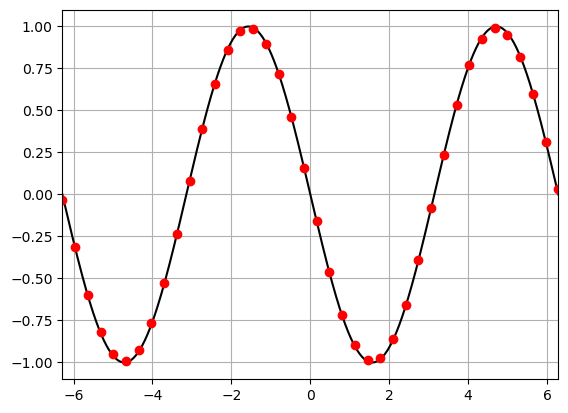

In [18]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_dubl_prime(x), 'k')
axes.plot(x_hat, f_dubl_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))
axes.grid()

plt.show()

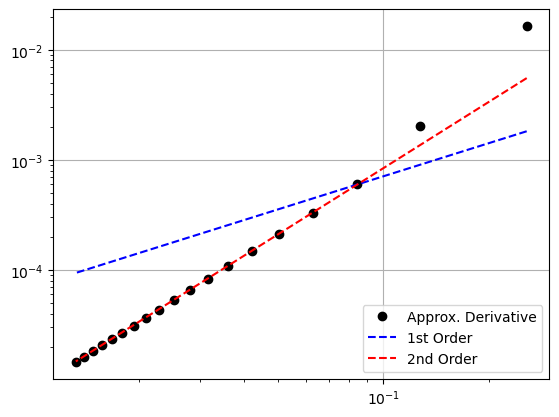

In [20]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_dubl_prime_hat = numpy.empty(x_hat.shape)
    f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x[-1]**2)

    # Use second-order differences for points at edge of domain
    f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x[-1]**2
    f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x[-1]**2
    
    error.append(numpy.linalg.norm(numpy.abs(f_dubl_prime(x_hat) - f_dubl_prime_hat), ord=numpy.inf))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error, "ko", label="Approx. Derivative")
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[2], error[2], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[2], error[2], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.grid()

plt.show()

# Integración Numérica - Cuadratura

**Objetivo:** Evaluar integrales

$$ \int^b_a f(x) dx$$

Muchas integrales no tienen soluciones en forma exacta
$$ 
   \int^b_a \sqrt{1 + \cos^2 x} dx
$$

Solución a ecuaciones diferenciales ordinarias
   
   $$\frac{\text{d}^2 u}{\text{d}t^2} = f\left(u, \frac{\text{d} u}{\text{d}t}, t \right)$$
   
   Definiendo $v = \frac{\text{d} u}{\text{d}t}$ se obtiene

   $$\begin{bmatrix}
   \frac{\text{d} v}{\text{d}t} \\ \frac{\text{d} u}{\text{d}t} \end{bmatrix} = \begin{bmatrix} f(u, v, t) \\ v \end{bmatrix}$$
   
   lo cual se puede resolver por integración
   
   $$\begin{bmatrix}
   v \\ u \end{bmatrix} = \begin{bmatrix} v(t_0) + \int^t_{t_0} f(u, v, \hat{t}) d\hat{t} \\ u(t_0) + \int^t_{t_0} v d\hat{t} \end{bmatrix}$$  

Resolviendo ecuaciones diferenciales parciales
$$
    u_t = \nabla^2 u
$$


### Fundamentos de la Cuadratura

Queremos aproximar una integral $I$ con alguna aproximación $I_N$ tal que
$$
    I = \int^b_a f(x) dx \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$
donde los $x_i$ son los *puntos de cuadratura* o *nodos* y los $w_i$ son los *pesos*. Usualmente, una regla de cuadratura particular especifica los puntos $x_i$ que resultan en un conjunto particular de pesos $w_i$.

La convergencia requiere que
$$
    \lim_{N \rightarrow \infty} I_N = I.
$$

## Sumas de Riemann

Dado $f(x)$ y una partición del intervalo $[a,b]$ con $\{x_i\}^N_{i=0}$ y $a = x_0 < x_1 < \ldots < x_N = b$ y $x^*_i \in [x_i, x_{i+1}]$, definimos la integral de Riemann como

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

Esta es una definición general que conduce a varios enfoques de cuadratura basados en cómo seleccionamos $x_i^* \in [x_i, x_{i+1}]$.

### Regla del Punto Medio

Elige $x_i^*$ tal que

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

de modo que

$$I[f] = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = I_N[f]$$

sobre $\Delta x_i = x_{i+1} - x_i$

#### Ejemplo: Integrar usando la regla del punto medio

Calcula e ilustra la regla del punto medio. Nota que aquí estamos calculando la integral acumulativa:

$$
    \int^x_0 \sin(\hat{x}) d\hat{x} = \left . -\cos \hat{x} \right|^x_0 = 1 - \cos x
$$

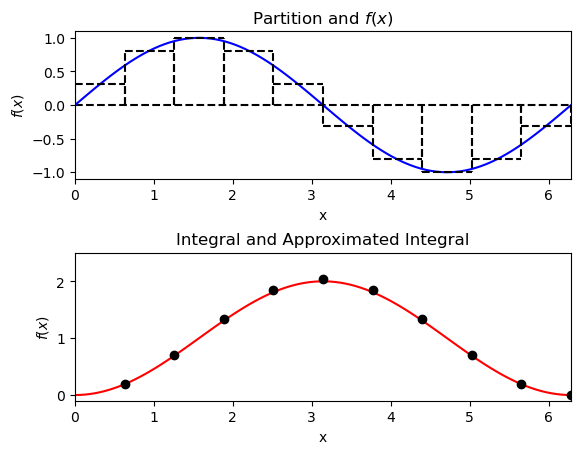

In [21]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_star.shape)
I_hat[0] = f(x_star[0]) * delta_x
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_star + delta_x / 2.0, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

### Cuadratura de Newton-Cotes

Usando $N+1$ puntos igualmente espaciados, evalúa $f(x)$ en estos puntos e integra exactamente el polinomio interpolante:

$$I_N[f] = \int^b_a P_N(x) dx$$

#### Regla del Trapecio

Usa un polinomio de grado $N = 1$ para derivar la regla del trapecio.

La regla del trapecio usa polinomios de orden $N = 1$ entre cada punto (es decir, polinomios lineales definidos por tramos). Los coeficientes del polinomio en cada intervalo son

$$p_0 = f(x_i) \quad \quad p_1 = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}$$

lo que nos da el polinomio interpolante

$$p_1(x) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} ( x- x_i) + f(x_i)$$

Integrando este polinomio obtenemos

$$\begin{aligned}
    I_N[f] &= \int^{x_{i+1}}_{x_i} (p_0 + p_1 (x - x_i)) dx = \left . p_0 x + p_1 \left (\frac{x^2}{2} - x_i x\right) \right |^{x_{i+1}}_{x_i} \\
    &= p_0 \Delta x + p_1 \left (\frac{1}{2} (x_{i+1} + x_i) \Delta x - x_i \Delta x\right) \\
    &= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i))\left (\frac{1}{2} (x_{i+1} + x_i) - x_i\right) \\
    &= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i)) \frac{\Delta x}{2} \\
    & = \frac{\Delta x}{2} (f(x_{i+1}) + f(x_i))
\end{aligned}$$

También podemos simplificar la suma sobre todos los intervalos al notar que todos, excepto los puntos extremos, tendrán una contribución total de $\Delta x$ a la suma total, de modo que

$$
    I_N[f] = \frac{\Delta x}{2} (f(x_0) + f(x_N) ) + \sum^{N-1}_{j=1} \Delta x f(x_j)
$$

Esto se conoce como la regla compuesta del trapecio.


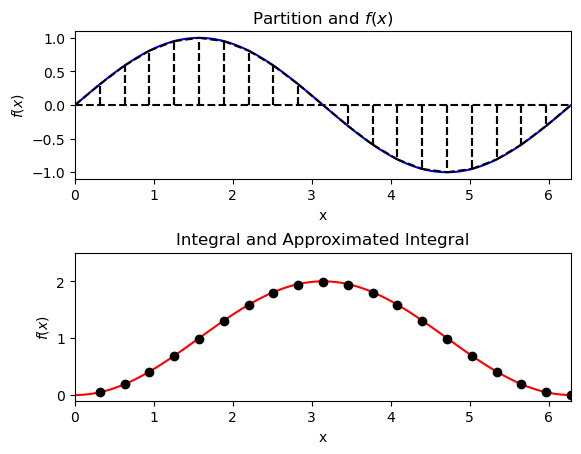

In [22]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

# Compute the integral
I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

#### Regla de Simpson

La regla de Simpson usa polinomios de orden $N = 2$ entre cada punto (es decir, polinomios cuadráticos definidos por tramos).

El polinomio tiene la forma

$$P_2(x) = \frac{2 f(x_i)}{\Delta x^2} \left (x - \frac{\Delta x}{2} \right ) (x - \Delta x) - \frac{4 f\left(x_i + \frac{\Delta x}{2}\right)}{\Delta x^2}  x (x - \Delta x) + \frac{2 f(x_{i+1})}{\Delta x^2} x \left (x - \frac{\Delta x}{2} \right )$$

Integrando este polinomio obtenemos

$$
    I_N[f] = \int^{x_{i+1}}_{x_i} P_2(x) dx = \frac{\Delta x}{6} f(x_i) + \frac{2 \Delta x}{3} f\left(x_i + \frac{\Delta x}{2} \right ) + \frac{\Delta x}{6} f(x_{i+1})
$$

También podemos mostrar esto usando el método de coeficientes indeterminados.

Usa la forma general de la regla de cuadratura y determina los pesos $w_j$ utilizando funciones cuya solución conocemos. Estas funciones pueden ser cualquier representación de polinomios de hasta orden $N=2$, sin embargo, los monomios $1$, $x$, $x^2$ son los más fáciles en este caso.

$$
    I_{\Delta x}[f] = w_0 f(0) + w_1 f(\Delta x / 2) + w_2 f(\Delta x)
$$

$$\begin{aligned}
    &\text{si}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x  \\
    &\text{si}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} \\
    &\text{si}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3}
\end{aligned}$$

¿Cuáles son los sistemas de ecuaciones correspondientes?

$$\begin{aligned}
    &\text{si}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x & & I_N[1] &= w_0 + w_1 + w_2 \\
    &\text{si}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} & & I_N[x] &= w_1 \frac{\Delta x}{2} + w_2\Delta x\\
    &\text{si}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3} & & I_N[x^2] &= \frac{\Delta x^2}{4} w_1 + w_2\Delta x^2\\
\end{aligned}$$

Luego tenemos el sistema de ecuaciones:
$$\begin{aligned}
    w_0 &+& w_1 &+& w_2 &=\Delta x \\
        &\quad& \frac{\Delta x}{2} w_1 &+& \Delta x w_2  &= \frac{\Delta x^2}{2} \\
        &\quad& \frac{\Delta x^2}{4} w_1 &+& \Delta x^2 w_2 &=\frac{\Delta x^3}{6} \\
\end{aligned}$$

o

$$\begin{bmatrix}
    1 & 1 & 1 \\
    0 & \Delta x / 2 & \Delta x \\
    0 & \Delta x^2 / 4 & \Delta x^2 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x^2 / 2 \\ \Delta x^3 / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 1 / 4 & 1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ \Delta x / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 0 & -1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ -\Delta x / 6
\end{bmatrix}$$

Lo que conduce a 

$$ w_2 = \frac{\Delta x}{6} \quad w_1 = \frac{2}{3} \Delta x \quad w_0 = \frac{\Delta x}{6}$$

Otra forma de escribir la regla de Simpson es usar intervalos de tres puntos (similar a una de las formas en que lo hicimos la vez pasada). La formulación aquí efectivamente tiene una $\Delta x$ que es la mitad de lo que muestran los intervalos, pero es más fácil de programar.


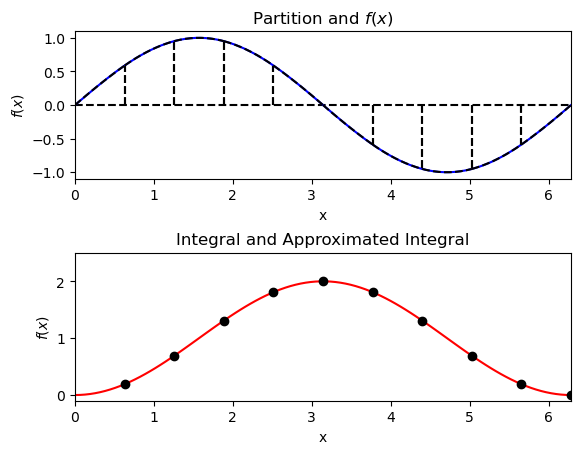

In [23]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i + 1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i + 1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

# Compute the integral
I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

## Análisis de Error

De antes, tenemos un esquema de cuadratura particular $I_N$ que también podemos escribir como
$$
    I_N[f] = \sum^{N-1}_{i=0} w_i f(x_i).
$$

Definimos el error $E[f]$ tal que

$$I[f] = I_N[f] + E_N[f]$$

El grado de $I_N[f]$ es el entero $N$ tal que $E_N[p_i] = 0 \quad \forall i \leq n$ y $\exists p_{n+1}$ tal que $E[p_{n+1}] \neq 0$.

### Precisión de la Cuadratura

También podemos usar nuestro análisis de polinomios anterior para analizar los errores cometidos al usar ambos métodos mencionados. Por el teorema de Lagrange, tenemos el término del residuo como antes, que podemos usar para observar el error

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$

e integrarlo para encontrar la forma y magnitud del error en un solo intervalo.

Para encontrar el error total, debemos sumar el error en todos los intervalos:

$$I[f] = \sum_{i=0}^N \int^{x_{i+1}}_{x_i} P_N(x) dx + \sum_{i=0}^N \int^{x_{i+1}}_{x_i} R_N(x) dx = I_N[f] + E_N[f]$$

como definimos antes.

#### Error en la Regla del Trapecio

Con $N=1$ tenemos

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

Integrando esto obtenemos

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = \frac{\Delta x^3}{12} f''(c)$$

lo que nos da una forma para el error.

Si sumamos en todos los intervalos, el error total es

$$E_N[f] = -\frac{\Delta x^3}{12} \sum_{i=0}^{N} f''(c_i)$$

o más ilustrativamente

$$E_N[f] = -\frac{1}{2} \Delta x^2 (b - a) \left [ \frac{1}{N} \sum^{N-1}_{i=0} f''(c_i) \right ]$$

donde la expresión entre corchetes es el valor promedio de la segunda derivada sobre el intervalo $[a,b]$. Esto también muestra que la regla del trapecio converge cuadráticamente cuando $\Delta x \rightarrow 0$.

#### Error en la Regla de Simpson

De manera similar aquí tenemos $N = 2$ y

$$R_2(x) = (x - x_i) \left(x - x_i - \frac{\Delta x}{2} \right) (x - x_{i+1}) \frac{f'''(c)}{3!}$$

Integrando y sumando las contribuciones del error encontramos

$$E_N[f] = -\frac{1}{180} (b - a) \Delta x^4 f^{(4)}(c)$$

¡Curiosamente, hemos ganado dos órdenes de precisión al aumentar el orden del polinomio en solo 1!

##### Ejemplo 1:

Si $f(x) = \sin \pi x$, observa la precisión relativa de las reglas del punto medio, trapecio y Simpson para un solo intervalo $x \in [0,1]$.

$$\begin{aligned}
    \text{Exacto:}  &I[f] = \int^1_0 \sin \pi x = \left . \frac{-\cos \pi x}{\pi} \right |^1_0 = \frac{2}{\pi} \approx 0.636619772 \\
    \text{Punto medio:}  &I_1[f] = \Delta x f(1/2) = \sin (\pi / 2) = 1 \\
    \text{Trapecio:}  &I_1[f] = \frac{\Delta x}{2} (\sin(0) + \sin(\pi)) = 0 \\
    \text{Simpson:}  &I_1[f] = \frac{\Delta x}{6} \sin(0) + \frac{2 \Delta x}{3} \sin(\pi / 2) + \frac{\Delta x}{6} \sin(\pi) = \frac{2 \Delta x}{3} = \frac{2}{3}
\end{aligned}$$


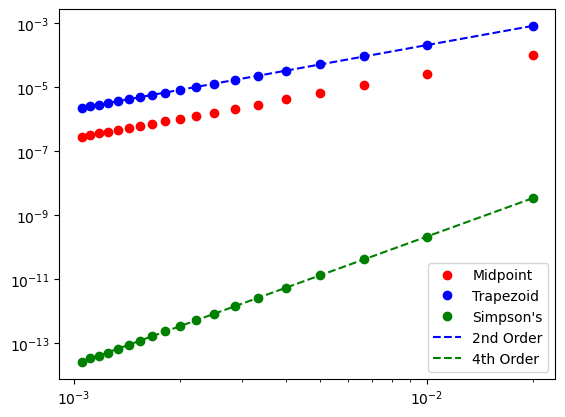

In [24]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_mid = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]

    # Compute Midpoint
    x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
    I_hat = 0.0
    for i in range(0, N):
        I_hat += f(x_star[i]) * delta_x[j]
    error_mid[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(1, N):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - 2.0 / numpy.pi)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, error_mid, 'ro', label="Midpoint")
axes.loglog(delta_x, error_trap, 'bo', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'go', label="Simpson's")
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.legend(loc=4)

plt.show()